In [1]:
# !pip install ydata_profiling==3.6.6

import seaborn as sns
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
# from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv',) #sep='\s+')

df.head(11)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
#number of distinct observations per group for each column'
df.nunique()


Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [ ]:
df.groupby('Cylinders').agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})


CO2 Emissions(g/km)          
                         mean  min  max
Cylinders                              
3                  174.894737  136  215
4                  204.859938   96  326
5                  235.692308  216  262
6                  263.446852  172  406
8                  320.619116  244  465
10                 361.309524  304  488
12                 381.033113  312  493
16                 522.000000  522  522

In [ ]:
df.notnull().sum()

Make                                7385
Model                               7385
Vehicle Class                       7385
Engine Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
CO2 Emissions(g/km)                 7385
dtype: int64

In [ ]:
df.duplicated().sum()

1103

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Length: 7385, dtype: bool

In [3]:
df2 = df.drop_duplicates()
print("After dropping duplicate columns:\n", df2)

After dropping duplicate columns:
        Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                    

In [4]:
df2.duplicated().sum()

0

In [14]:
var = 'Cylinders'
try_var = df2[df2[var]==7][var]

sns.boxplot(data=df2, y='''Engine Size(L)''', x=try_var , hue="Fuel Type")
#CO2 Emissions(g/km)

ValueError: ignored

<Axes: xlabel='Cylinders', ylabel='Engine Size(L)'>

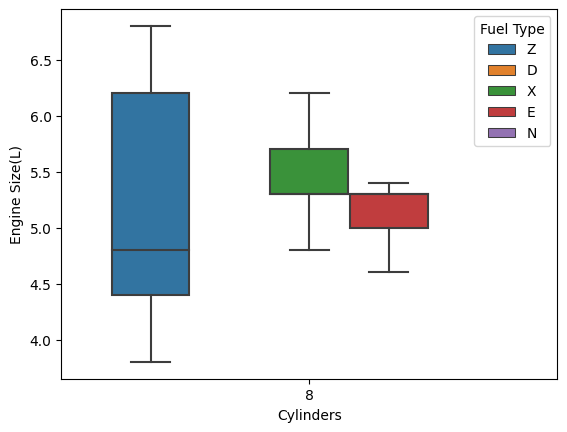

In [18]:
from scipy import stats
# Assuming your DataFrame is named df2
var = 'Cylinders'
try_var = df2[df2[var]==8][var]
threshold = 5.5

# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df2.copy()

# Filter rows where Fuel Type is 'E'
fuel_type_e_rows = df_copy[df_copy['Fuel Type'] == 'E']

# Calculate z-scores for the 'Engine Size(L)' column within Fuel Type 'E'
z_scores_e = stats.zscore(fuel_type_e_rows['Engine Size(L)'])

# Identify rows with z-scores beyond the threshold
outliers_mask = abs(z_scores_e) > threshold

# Remove outliers for Fuel Type 'E'
df_copy.loc[(df_copy['Fuel Type'] == 'E') & (df_copy['Engine Size(L)'] > threshold), 'Engine Size(L)'] = None

threshold_x = 4.74

# Remove outliers for Fuel Type 'X'
df_copy.loc[(df_copy['Fuel Type'] == 'X') & (df_copy['Engine Size(L)'] < threshold_x), 'Engine Size(L)'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df_copy, y='Engine Size(L)', x=try_var, hue="Fuel Type")


<Axes: xlabel='Cylinders', ylabel='Engine Size(L)'>

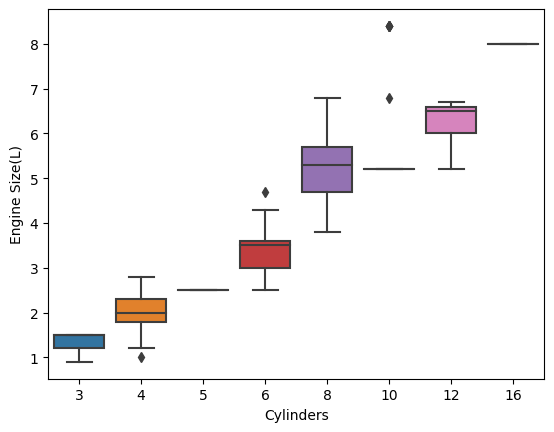

In [20]:
var = 'Cylinders'
sns.boxplot(data=df2, y='''Engine Size(L)''', x=var )

<Axes: >

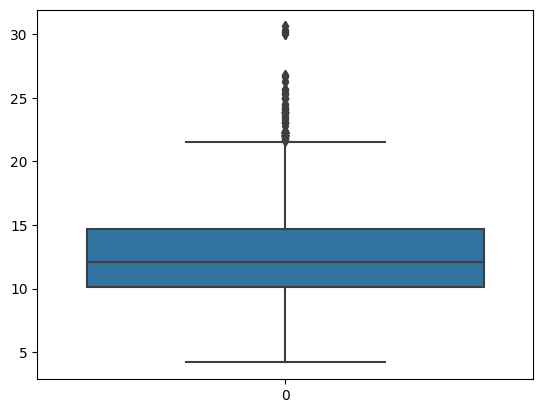

In [ ]:
sns.boxplot(df2['Fuel Consumption City (L/100 km)'])

In [ ]:
#Z-Score method
upper_limit = df2["Fuel Consumption City (L/100 km)"].mean() + 3*df2["Fuel Consumption City (L/100 km)"].std()
lower_limit = df2["Fuel Consumption City (L/100 km)"].mean() - 3*df2["Fuel Consumption City (L/100 km)"].std()

print(upper_limit,f'  ', lower_limit)

#df2.loc[(df2["Fuel Consumption City (L/100 km)"].where('Cylinders'==4))]

23.269418601242645    1.9510207492826623


In [ ]:
df2.loc[(df2["Fuel Consumption City (L/100 km)"]> upper_limit) | (df2["Fuel Consumption City (L/100 km)"] <lower_limit)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
212,CHEVROLET,EXPRESS 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
214,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13,344
216,CHEVROLET,EXPRESS 1500 CARGO CONV,VAN - CARGO,5.3,8,A4,E,23.9,18.5,21.5,13,344
218,CHEVROLET,EXPRESS 1500 CARGO CONV AWD,VAN - CARGO,5.3,8,A4,E,25.3,19.3,22.6,12,362
220,CHEVROLET,EXPRESS 1500 PASSENGER,VAN - PASSENGER,5.3,8,A4,E,23.9,18.5,21.5,13,344
222,CHEVROLET,EXPRESS 1500 PASSENGER AWD,VAN - PASSENGER,5.3,8,A4,E,25.3,19.3,22.6,12,362
225,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.0,20.4,25.7,11,411
228,CHEVROLET,EXPRESS 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.2,20.5,25.8,11,413


In [ ]:
new_df = df2.loc[(df2["Fuel Consumption City (L/100 km)"]< upper_limit) & (df2["Fuel Consumption City (L/100 km)"] >lower_limit)]
new_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<Axes: >

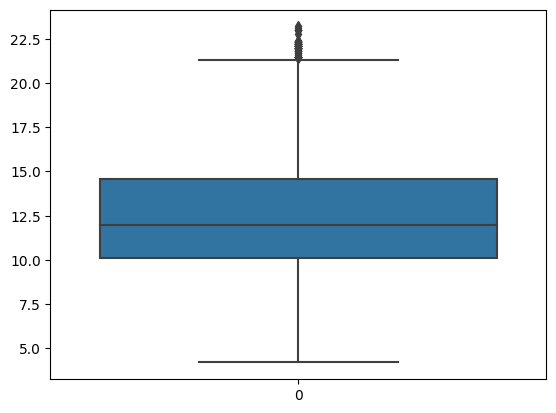

In [ ]:
sns.boxplot(new_df['Fuel Consumption City (L/100 km)'])

In [ ]:
#Z-Score method
upper_limit = new_df["Fuel Consumption City (L/100 km)"].mean() + 3*new_df["Fuel Consumption City (L/100 km)"].std()
lower_limit = new_df["Fuel Consumption City (L/100 km)"].mean() - 3*new_df["Fuel Consumption City (L/100 km)"].std()

print(upper_limit,f'  ', lower_limit)


22.5198968083385    2.461591219943676


<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

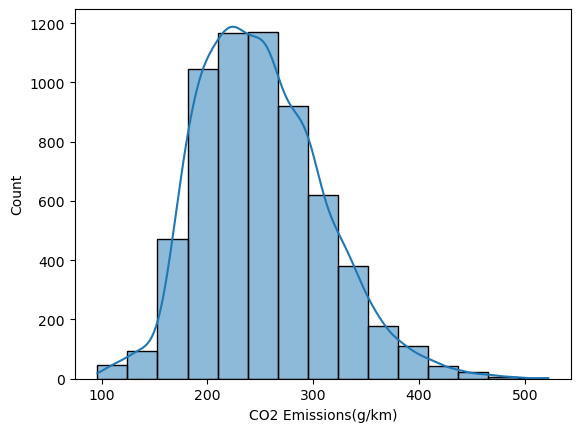

In [ ]:
sns.histplot(df2["CO2 Emissions(g/km)"], kde=True, bins=15)

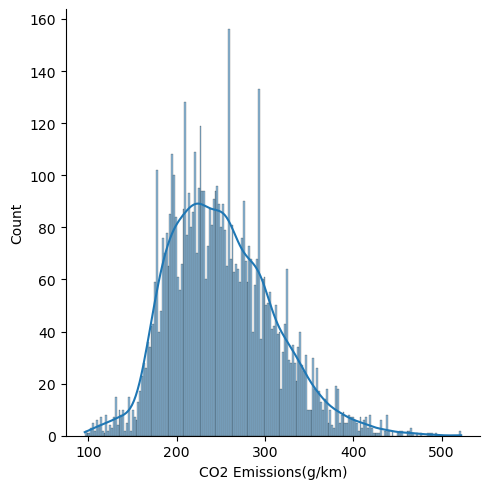

In [ ]:
sns.displot(df2["CO2 Emissions(g/km)"], kde=True, bins=200)

In [ ]:
#Fuel Consumption City (L/100 km)  7385 non-null   float64
# 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
# 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
# 10  Fuel Consumption Comb (mpg)       7385 non-null   int64
# 11  CO2 Emissions(g/km)               7385 non-null   int64

In [ ]:
df3=df2.groupby("Engine Size(L)").agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max'], "Fuel Consumption City (L/100 km)": ['mean', 'min', 'max'],})

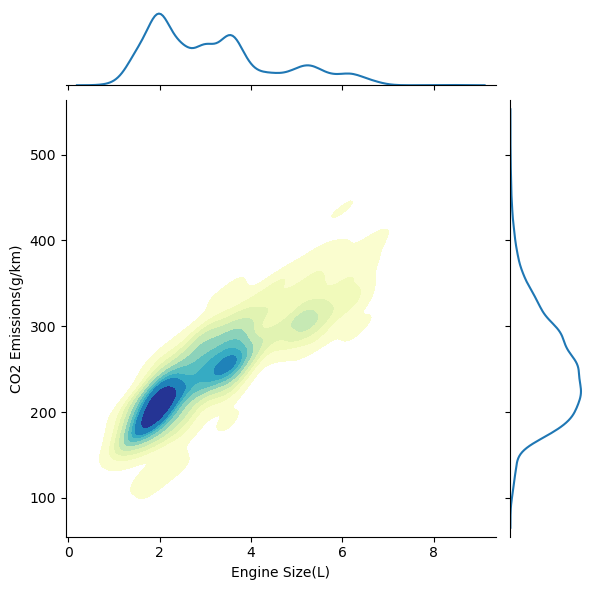

In [ ]:
sns.jointplot(data=df2, y='''CO2 Emissions(g/km)''', x="Engine Size(L)",  kind="kde", shade=True,cmap="YlGnBu")

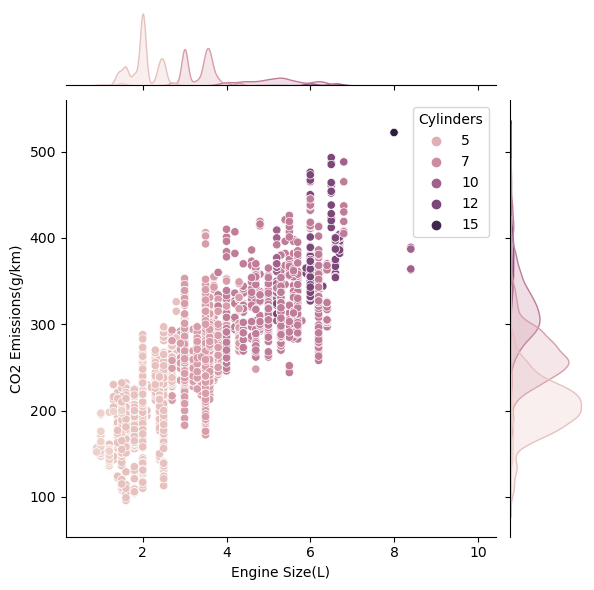

In [ ]:
sns.jointplot(data=df2, y='''CO2 Emissions(g/km)''', x="Engine Size(L)",  hue="Cylinders")

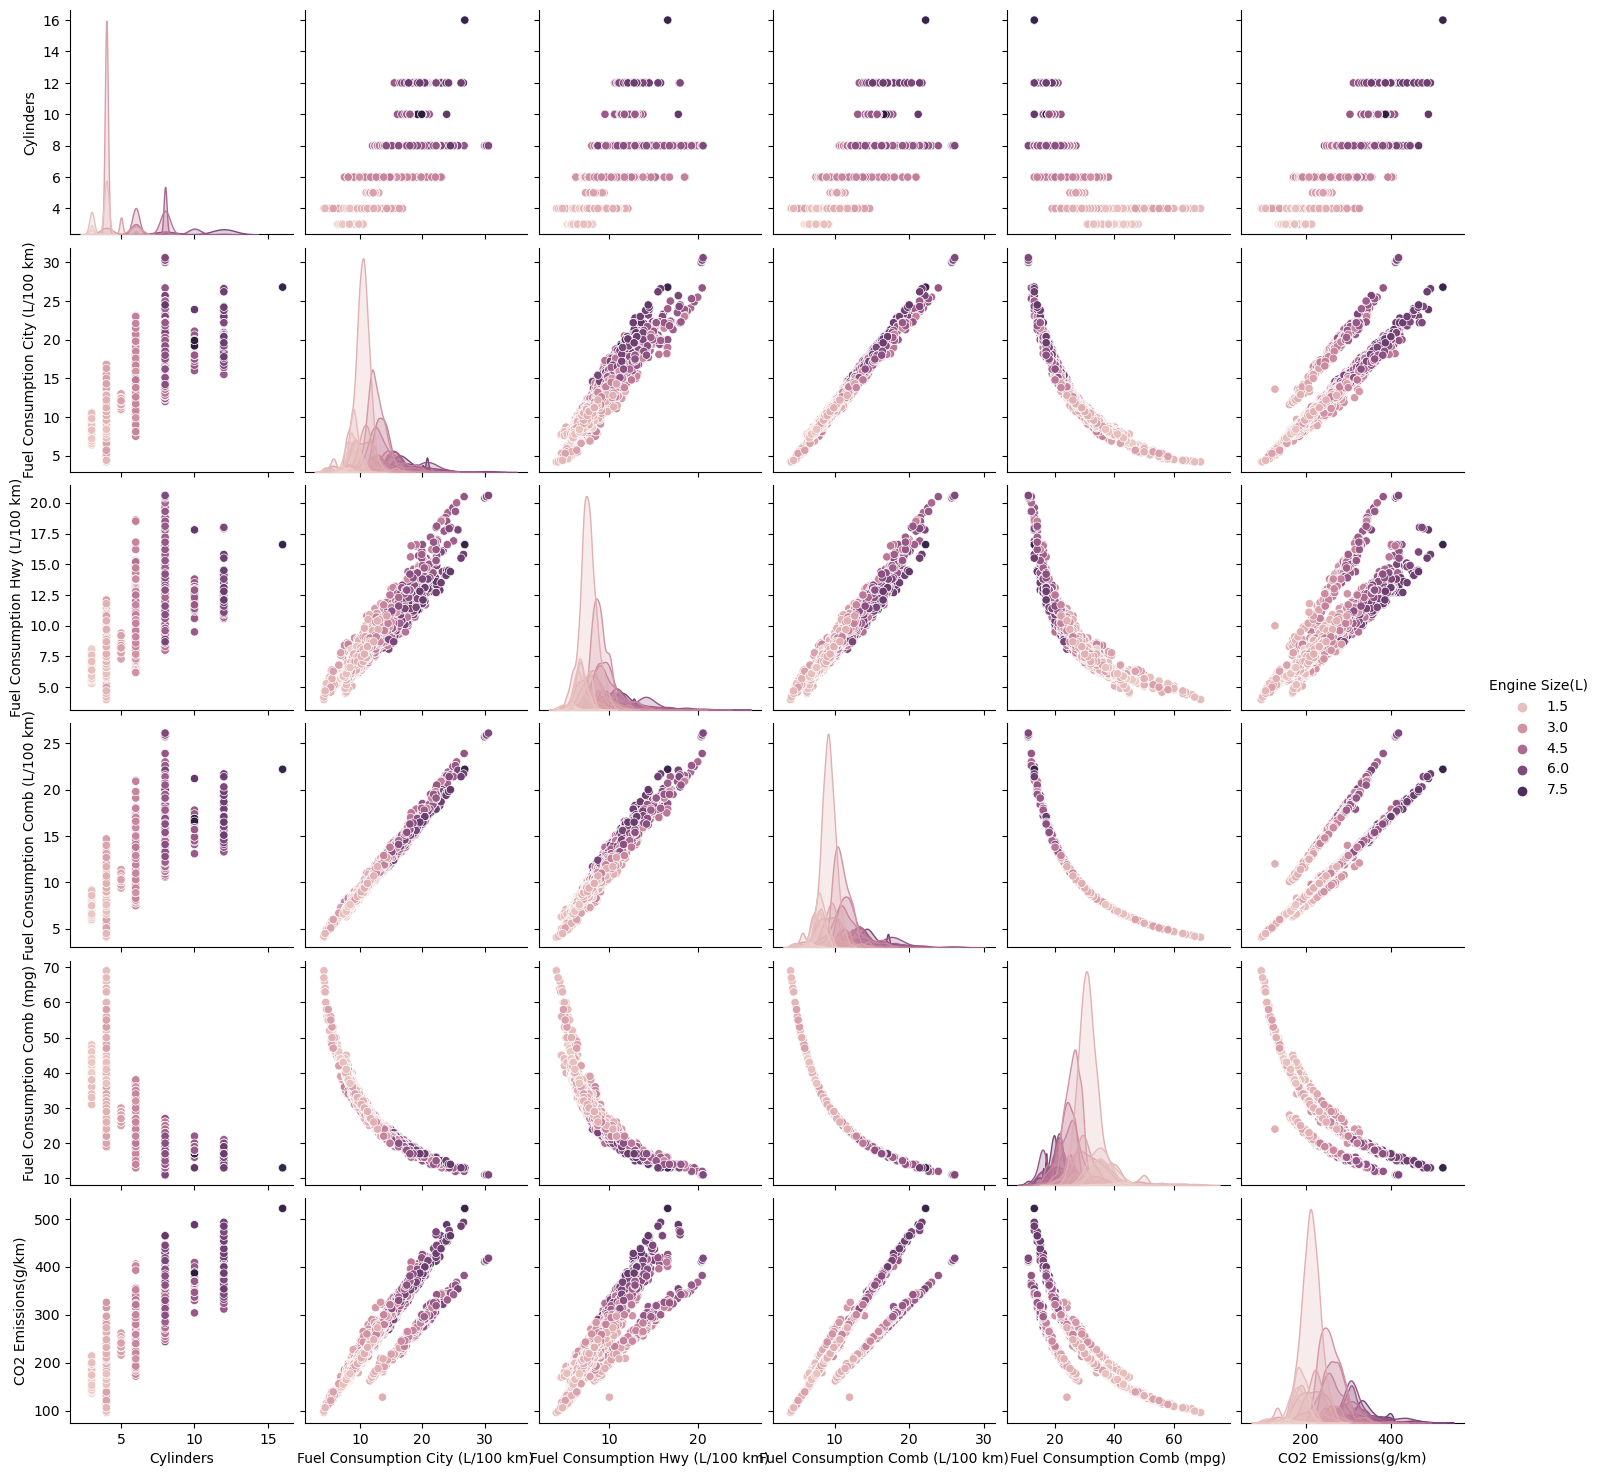

In [ ]:
sns.pairplot(df2.select_dtypes(['number']), hue="Engine Size(L)")

<Axes: >

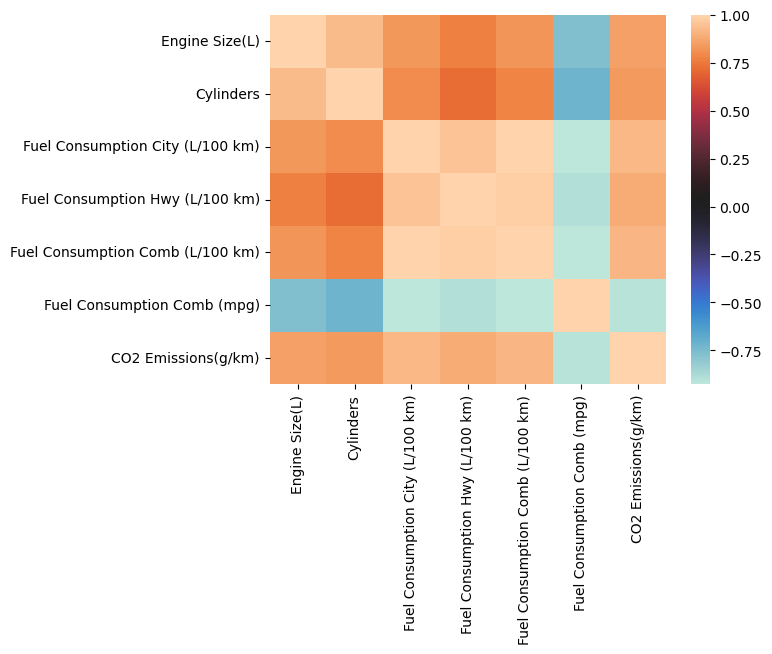

In [ ]:
sns.heatmap(df2.corr(), cmap="icefire")

###using ChatGpt

In [ ]:
df2['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16])

Original DataFrame shape: (6282, 12)
DataFrame shape after removing outliers: (6282, 12)


<Axes: >

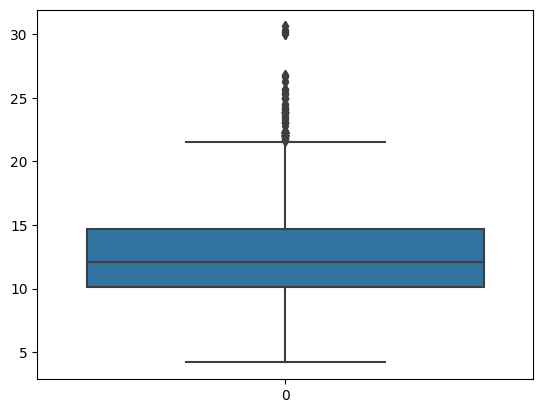

In [ ]:
from scipy import stats

# Assuming your DataFrame is named df
column_name = 'Fuel Consumption City (L/100 km)'

# Calculate z-scores for the column
z_scores = stats.zscore(df2[column_name])

# Define a threshold based on your boxplot observation
threshold = 20

# Filter out rows with values beyond the threshold
outliers_removed_df = df2[abs(z_scores) < threshold]

# Print the shape of the original and filtered DataFrame
print(f"Original DataFrame shape: {df2.shape}")
print(f"DataFrame shape after removing outliers: {outliers_removed_df.shape}")

sns.boxplot(outliers_removed_df['Fuel Consumption City (L/100 km)'])

<Axes: xlabel='Cylinders', ylabel='Engine Size(L)'>

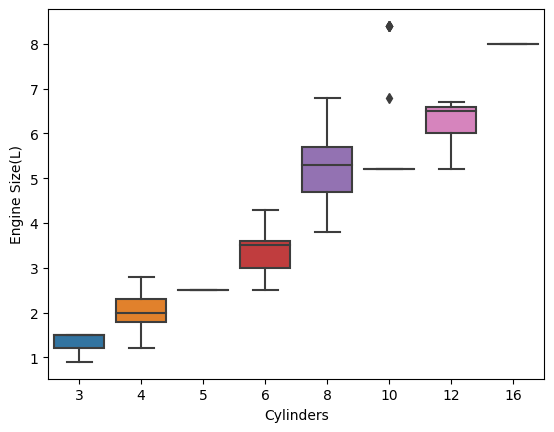

In [24]:
var = 'Cylinders'
threshold_4 = 1.2
threshold_6 = 4.4

# Create a copy of the DataFrame to avoid modifying the original data
df4 = df2.copy()

# Remove outliers for Cylinder value 4
df4.loc[(df4[var] == 4) & (df4['Engine Size(L)'] < threshold_4), 'Engine Size(L)'] = None

# Remove outliers for Cylinder value 6
df4.loc[(df4[var] == 6) & (df4['Engine Size(L)'] > threshold_6), 'Engine Size(L)'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df4, y='Engine Size(L)', x=var)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

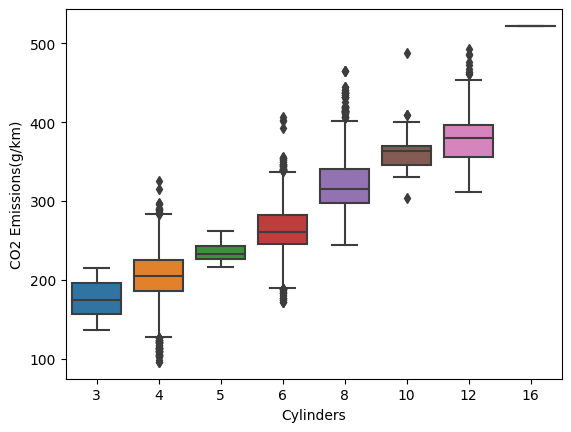

In [25]:
var = 'Cylinders'
sns.boxplot(data=df2, y='''CO2 Emissions(g/km)''', x=var )

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

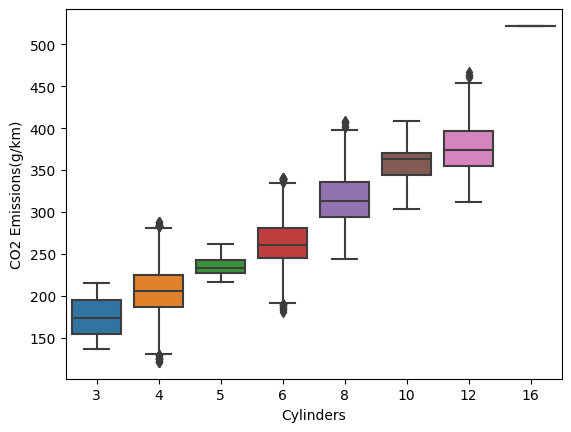

In [32]:
import numpy as np

# Assuming your DataFrame is named df4
var = 'Cylinders'
threshold = 3  # You can adjust this threshold based on your requirements

# Create a copy of the DataFrame to avoid modifying the original data
df4_copy = df4.copy()

# Function to calculate modified z-score
def calculate_modified_zscore(series):
    median = series.median()
    median_absolute_deviation = np.median(np.abs(series - median))
    modified_zscores = 0.6745 * (series - median) / median_absolute_deviation
    return np.abs(modified_zscores)

# Apply modified z-score for each group of cylinders
outlier_mask = df4_copy.groupby(var)['CO2 Emissions(g/km)'].transform(calculate_modified_zscore) > threshold

# Remove outliers
df4_copy.loc[outlier_mask, 'CO2 Emissions(g/km)'] = None

# Plot the boxplot without outliers
sns.boxplot(data=df4_copy, y='CO2 Emissions(g/km)', x=var)


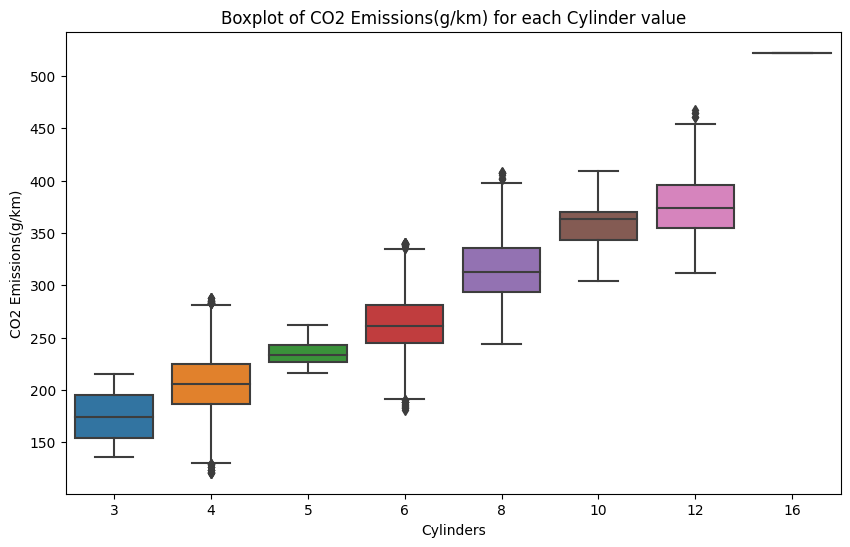

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df4_copy
var = 'Cylinders'

# Create a boxplot to visualize the remaining outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4_copy, y='CO2 Emissions(g/km)', x=var)
plt.title('Boxplot of CO2 Emissions(g/km) for each Cylinder value')
plt.show()


In [30]:
# Assuming your DataFrame is named df4
df4[df4['Cylinders'] == 16]


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [31]:
# Assuming your DataFrame is named df
df4['Vehicle Class'] = df['Vehicle Class'].str.strip().str.upper()
df4['Make'] = df['Make'].str.strip().str.upper()
df4['Model'] = df['Model'].str.strip().str.upper()

df4 = df4.drop_duplicates()
df4.duplicated().sum()


0

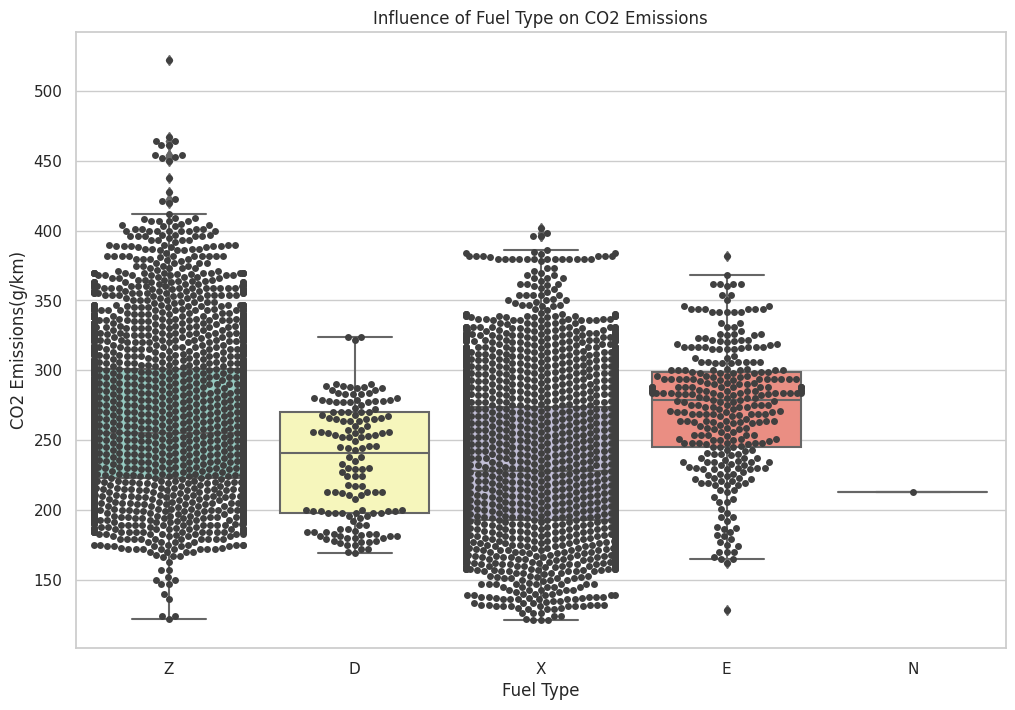

In [34]:
# This is to see the influence of fuel type on the CO2 emissions
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df4_copy, palette="Set3")
sns.swarmplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df4_copy, color=".25")

plt.title('Influence of Fuel Type on CO2 Emissions')
plt.show()

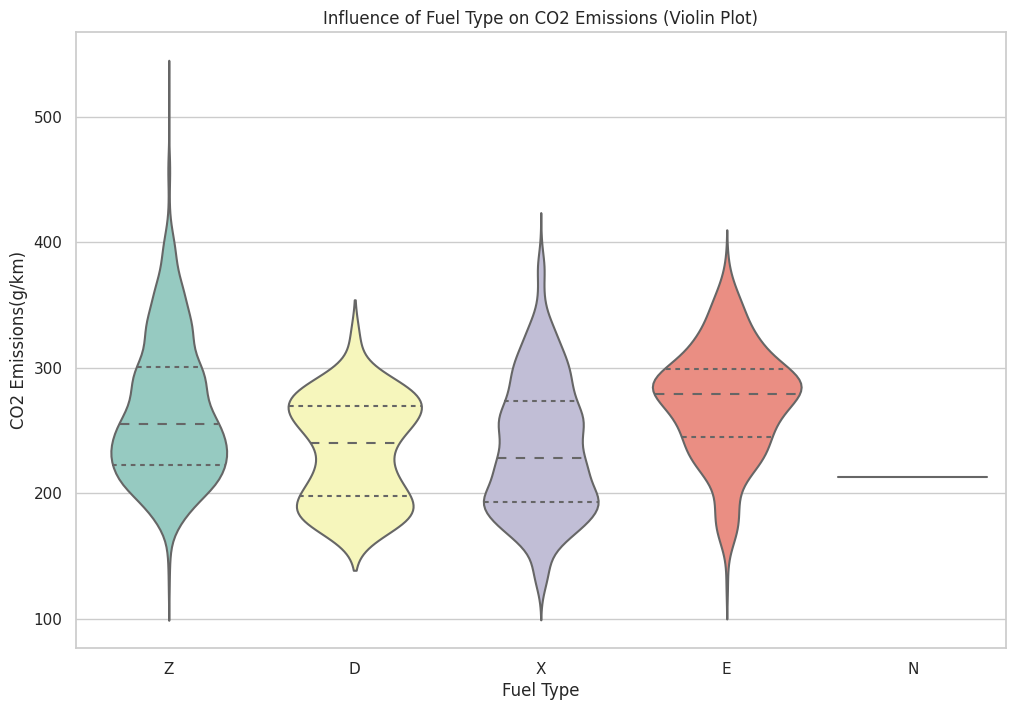

In [35]:

#To visualize the correlation or influence of the fuel type on CO2 emissions, you can create a boxplot or a violin plot to compare the distributions of CO2 emissions for each fuel type

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df4_copy, palette="Set3", inner="quartile")

plt.title('Influence of Fuel Type on CO2 Emissions (Violin Plot)')
plt.show()

In [74]:
print("Shape of the original DataFrame (df):", df.shape)

# Display the shape of the copied DataFrame
print("Shape of the copied DataFrame (df4_copy):", df4_copy.shape)

Shape of the original DataFrame (df): (7385, 12)
Shape of the copied DataFrame (df4_copy): (5989, 13)


### **Checking for nan values**

In [40]:
df4.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      2
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [46]:
# Assuming your DataFrame is named df4_copy
df4_copy['Engine Size(L)_filled'] = df4_copy.groupby(['Make', 'Model'])['Engine Size(L)'].transform(lambda x: x.fillna(x.mean()))

# Display the updated DataFrame
print("Updated DataFrame with filled values:")
print(df4_copy)


Updated DataFrame with filled values:
       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                 

In [51]:
# Assuming your DataFrame is named df4
nan_rows = df4_copy[df4_copy['Engine Size(L)'].isna()]

# Display the rows with NaN values in the 'Engine Size(L)' column
print("Rows with NaN values in the 'Engine Size(L)' column:")
print(nan_rows)

Rows with NaN values in the 'Engine Size(L)' column:
               Make         Model Vehicle Class  Engine Size(L)  Cylinders  \
394            FORD    FIESTA SFE    SUBCOMPACT             NaN          4   
1868  MERCEDES-BENZ  S 400 4MATIC      MID-SIZE             NaN          6   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
394            M5         X                               7.5   
1868          AS7         Z                              12.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
394                               5.5                               6.6   
1868                              8.6                              10.8   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Engine Size(L)_filled  
394                            43                152.0                    NaN  
1868                           26                248.0                    NaN  


In [53]:
df4_copy['Engine Size(L)_filled'] = df4_copy.groupby('Model')['Engine Size(L)'].transform(lambda x: x.fillna(x.max()))

# Display the updated DataFrame
print("Updated DataFrame with filled values:")
print(df4_copy[df4_copy['Engine Size(L)_filled'].isna()])


Updated DataFrame with filled values:
               Make         Model Vehicle Class  Engine Size(L)  Cylinders  \
1868  MERCEDES-BENZ  S 400 4MATIC      MID-SIZE             NaN          6   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1868          AS7         Z                              12.6   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1868                              8.6                              10.8   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Engine Size(L)_filled  
1868                           26                248.0                    NaN  


In [69]:
# Assuming your DataFrame is named df4_copy
window_size = 3  # Adjust the window size as needed

# Create a new column 'Engine Size(L)_filled' with nulls filled using rolling mean by 'Model'
df4_copy['Engine Size(L)_filled'] = df4_copy.groupby('Model')['Engine Size(L)'].transform(
    lambda x: x.fillna(x.rolling(window=window_size, min_periods=1).mean())
)

# Display the updated DataFrame
print("Updated DataFrame with filled values:")
print(df4_copy)

Updated DataFrame with filled values:
       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                 

In [71]:
df4_copy['CO2 Emissions(g/km)'] = df4_copy.groupby('Model')['CO2 Emissions(g/km)'].transform(lambda x: x.fillna(x.mean()))
df4_copy['CO2 Emissions(g/km)'] = df4_copy.groupby('Cylinders')['CO2 Emissions(g/km)'].transform(lambda x: x.fillna(x.mean()))

df4_copy['Engine Size(L)'] = df4_copy['Engine Size(L)_filled']
#df4_copy.drop('Engine Size(L)_filled ', axis=1, inplace=True)
df4_copy.dropna(subset=['Engine Size(L)'], inplace=True)
df4_copy.isnull().sum()


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Engine Size(L)_filled               0
dtype: int64

### **Predictions**

using the same df4_copy,
can i predict if depending on the 'Cylinders', the 'Engine Size(L)', the '' and the revenues if the movie will be succeful, write the code for thaat **bold text**

1. using a Linear Regression prediction method  on df4_copy,
can i predict if depending on the 'Cylinders', the 'Engine Size(L)', the 'Fuel Type' and the 'Fuel Consumption Comb (mpg)'
can we predict the 'CO2 Emissions(g/km)'

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['Cylinders', 'Engine Size(L)', 'Fuel Type', 'Fuel Consumption Comb (mpg)']]
y = df4_copy['CO2 Emissions(g/km)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['Fuel Type'])
    ],
    remainder='passthrough'
)

# Linear Regression model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 364.28
R-squared: 0.89


Mean Squared Error (MSE):

Definition: MSE measures the average squared difference between the predicted values and the actual values.
Interpretation: Lower MSE values indicate a better fit of the model to the data. It represents the average magnitude of the squared errors, with smaller values indicating better performance.
In your case, a MSE of 364.28 suggests that, on average, the squared difference between the predicted and actual values of 'CO2 Emissions(g/km)' is 364.28.

R-squared (Coefficient of Determination):

Definition: R-squared measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
Interpretation: R-squared values range from 0 to 1. Higher values indicate a better fit, with 1 meaning that the model explains all the variability in the target variable.
In your case, an R-squared of 0.89 suggests that approximately 89% of the variance in 'CO2 Emissions(g/km)' is explained by the independent variables used in your regression model. This is a relatively high R-squared value and indicates a good fit of the model to the data.

In summary, your model has a relatively low MSE, indicating accurate predictions, and a high R-squared, suggesting that a substantial portion of the variability in 'CO2 Emissions(g/km)' is captured by the model. However, it's always important to consider the context of your specific problem and potential limitations of the model.

## **#2. Support Vector Machine method**

2. using a Support Vector Machine method  on df4_copy,
can i predict if depending on the 'Cylinders', the 'Engine Size(L)', the 'Fuel Type' and the 'Fuel Consumption Comb (mpg)'
can we predict the 'CO2 Emissions(g/km)'

and tabulate the results

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['Cylinders', 'Engine Size(L)', 'Fuel Type', 'Fuel Consumption Comb (mpg)']]
y = df4_copy['CO2 Emissions(g/km)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['Fuel Type'])
    ],
    remainder='passthrough'
)

# Support Vector Machine model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Results DataFrame:
      Actual   Predicted
3491   284.0  293.063342
3279   187.0  186.803048
1999   255.0  266.760016
7037   165.0  166.741110
3605   312.0  308.267336
...      ...         ...
1584   276.0  274.670829
4364   221.0  219.142596
6698   246.0  312.707715
1901   198.0  198.492548
4365   216.0  212.060256

[1198 rows x 2 columns]

Mean Squared Error: 405.01
R-squared: 0.88


The Mean Squared Error (MSE) of 405.01 and R-squared of 0.88 suggest that your Support Vector Machine (SVM) model performed reasonably well, but the interpretation depends on the specific context of your problem.

1. **Mean Squared Error (MSE):**
   - **Interpretation:** MSE measures the average squared difference between the predicted and actual values. Lower MSE values are desirable, and a value of 405.01 indicates that, on average, the squared difference between predicted and actual 'CO2 Emissions(g/km)' is 405.01.

2. **R-squared (Coefficient of Determination):**
   - **Interpretation:** R-squared measures the proportion of the variance in the target variable ('CO2 Emissions(g/km)') that is explained by the model. An R-squared of 0.88 means that approximately 88% of the variability in 'CO2 Emissions(g/km)' is captured by the features used in the SVM model.

In general, an R-squared of 0.88 is considered high, indicating a good fit of the model to the data. However, it's essential to consider the specifics of your problem and the distribution of your data. It might be helpful to compare these metrics with those obtained from other models or to establish a baseline for comparison.

Additionally, you may want to inspect the distribution of residuals and check for any patterns or outliers. Visualization tools like residual plots can provide insights into how well your model captures the underlying patterns in the data.

In summary, the results suggest that your SVM model is capturing a substantial portion of the variability in 'CO2 Emissions(g/km)', but it's always advisable to validate the model thoroughly based on the specific requirements and characteristics of your data.

## **#3. KNN**
using a KNN method on df4_copy, can i predict if depending on the 'Cylinders', the 'Engine Size(L)', the 'Fuel Type' and the 'Fuel Consumption Comb (mpg)' can we predict the 'CO2 Emissions(g/km)'
and tabulate the results

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['Cylinders', 'Engine Size(L)', 'Fuel Type', 'Fuel Consumption Comb (mpg)']]
y = df4_copy['CO2 Emissions(g/km)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['Fuel Type'])
    ],
    remainder='passthrough'
)

# KNN model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Results DataFrame:
      Actual  Predicted
3491   284.0      285.0
3279   187.0      187.0
1999   255.0      262.6
7037   165.0      163.8
3605   312.0      312.2
...      ...        ...
1584   276.0      271.6
4364   221.0      220.0
6698   246.0      238.2
1901   198.0      199.2
4365   216.0      210.6

[1198 rows x 2 columns]

Mean Squared Error: 35.40
R-squared: 0.99


Yes, based on the Mean Squared Error (MSE) of 35.40 and R-squared of 0.99, it seems like your k-Nearest Neighbors (KNN) model performed very well on the test set. Let's interpret these metrics:

1. **Mean Squared Error (MSE):**
   - **Interpretation:** MSE measures the average squared difference between the predicted and actual values. Lower MSE values are better, and a value of 35.40 indicates that, on average, the squared difference between predicted and actual 'CO2 Emissions(g/km)' is 35.40.

2. **R-squared (Coefficient of Determination):**
   - **Interpretation:** R-squared measures the proportion of the variance in the target variable ('CO2 Emissions(g/km)') that is explained by the model. An R-squared of 0.99 means that approximately 99% of the variability in 'CO2 Emissions(g/km)' is captured by the features used in the KNN model. This is an exceptionally high value, suggesting an excellent fit of the model to the data.

An R-squared close to 1 indicates that the model explains almost all the variability in the target variable, and an MSE of 35.40 suggests that the predictions are very close to the actual values on average.

It's crucial to consider the characteristics of your specific problem and dataset. In some cases, extremely high performance on the training set might indicate overfitting, so it's beneficial to evaluate the model on an independent test set.

In summary, based on these metrics, it appears that your KNN model performed very well on the test set for predicting 'CO2 Emissions(g/km)'.

## ** #4 Decision trees **
using a Decision trees method on df4_copy, can i predict if depending on the 'Cylinders', the 'Engine Size(L)', the 'Fuel Type' and the 'Fuel Consumption Comb (mpg)' can we predict the 'CO2 Emissions(g/km)'
and tabulate the results

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named df4_copy
# Assuming 'CO2 Emissions(g/km)' is the target variable

# Selecting predictors and target variable
X = df4_copy[['Cylinders', 'Engine Size(L)', 'Fuel Type', 'Fuel Consumption Comb (mpg)']]
y = df4_copy['CO2 Emissions(g/km)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encoding for 'Fuel Type'
preprocessor = ColumnTransformer(
    transformers=[
        ('fuel_type', OneHotEncoder(), ['Fuel Type'])
    ],
    remainder='passthrough'
)

# Decision Tree model in a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Results DataFrame:")
print(results)

# Display the evaluation metrics
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Results DataFrame:
      Actual   Predicted
3491   284.0  285.500000
3279   187.0  187.529412
1999   255.0  262.764706
7037   165.0  164.461538
3605   312.0  313.333333
...      ...         ...
1584   276.0  274.681818
4364   221.0  219.753623
6698   246.0  241.875000
1901   198.0  199.500000
4365   216.0  212.500000

[1198 rows x 2 columns]

Mean Squared Error: 29.08
R-squared: 0.99
